In [1]:
# Als aller erstes müssen wir noch eine Bibliothek installieren
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=f8e12289d70e1c1501c0b1541647927b33c557f29eb53cff53d836ea56c8d9fe
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [1]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Wir machen google-drive dem Notebook bekannt, um Zugriff auf die Daten zu erhalten
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/hackerschool/training_data' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Die in Modul 2a gespeicherten Encodings müssen wir wieder laden 
encoding_file = '/content/drive/MyDrive/hackerschool/training_data/encodings.pickle'
# und dezerialisieren
stored_encodings = pickle.loads(open(encoding_file, "rb").read())

In [28]:
# Wir suchen uns ein Bild aus den Testbilder aus
# test_image_file = '/content/drive/MyDrive/hackerschool/training_data/kamala_harris/kamala_harris016.jpg'
test_image_file = '/content/drive/MyDrive/hackerschool/images/dpa-3872~_v-800x450_c-1584563602179.jpg'
test_image = cv2.imread(test_image_file)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Über die Bibliothek wird versucht das Bild zu finden
boxes = face_recognition.face_locations(test_image, model='cnn')
encodings = face_recognition.face_encodings(test_image, boxes)

names = []
# alle gefundenen Encodings werden durchlaufen, und es wird überprüft, ob eines davon
# bereits bekannt ist
for encoding in encodings:
    matches = face_recognition.compare_faces(stored_encodings['encodings'], encoding)
    name="Unknown"
    if True in matches:
        matchedIdxs = [i for (i,b) in enumerate(matches) if b]
        counts = {}        
        for i in matchedIdxs:
            name = stored_encodings["names"][i]
            counts[name] = counts.get(name, 0) +1
    
        name = max(counts, key=counts.get)
    names.append(name)
    # wenn ein Name gefunden wurde, schreiben wir diesen auf das Bild
    cv2.putText(test_image, name, (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255,0), 1, cv2.LINE_AA) 


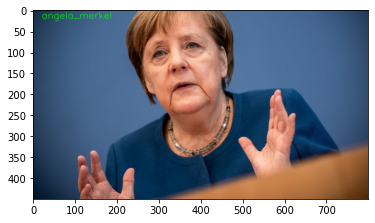

In [29]:
plt.imshow(test_image)
plt.show()